In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:
data = '../lesson6/AAPL.csv'




In [3]:
df = pd.read_csv(data)

In [4]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [5]:
df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0
5,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.022704,12157600.0
6,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.023809,9340800.0
7,1980-12-23,0.551339,0.553571,0.551339,0.551339,0.024814,11737600.0
8,1980-12-24,0.580357,0.582589,0.580357,0.580357,0.026120,12000800.0
9,1980-12-26,0.633929,0.636161,0.633929,0.633929,0.028531,13893600.0


In [6]:
df.set_index('Date', inplace=True)


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
date_start = '2017-10-01'
date_end = '2017-12-31'

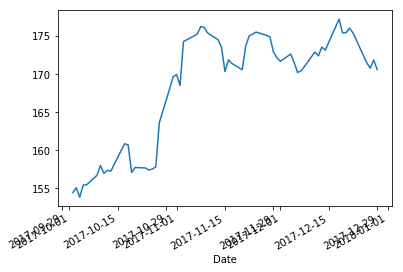

In [10]:
df['High'][date_start:date_end].plot()

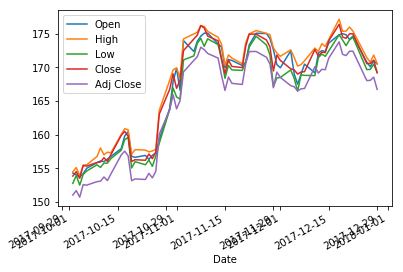

In [11]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']][date_start:date_end].plot()

/home/gad/wd/projects/analyst_to_prorammer/my_venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


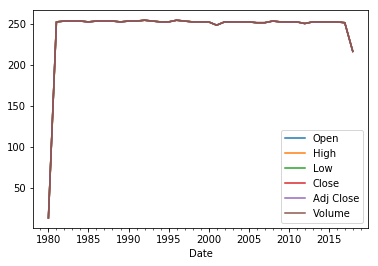

In [12]:
df.resample('Y', how='count').plot()

In [24]:
index_df = pd.read_fwf(
        './form.idx',
        skiprows=10,
        names=['form', 'company', 'cik', 'date', 'file'],
        widths=[12, 62, 12, 12, 51])

In [25]:
index_df.head()

,form,company,cik,date,file
0,10-12B,IMPERIAL PARKING CORP,1103389,2000-01-20,edgar/data/1103389/0000950135-00-000187.txt
1,10-12B,MILLENNIUM GROUP HOLDINGS INC,1104142,2000-02-10,edgar/data/1104142/0001038838-00-000093.txt
2,10-12B,ON POINT TECHNOLOGY SYSTEMS INC,896195,2000-03-30,edgar/data/896195/0000896195-00-000006.txt
3,10-12B,UNITREND INC,1035066,2000-03-30,edgar/data/1035066/0000950152-00-002461.txt
4,10-12B,WALL STREET WEB INC,1109885,2000-03-27,edgar/data/1109885/0001095811-00-000689.txt


In [38]:
counts_df  = index_df[['form', 'cik']].groupby('form').count()
counts_df.head()

,cik
form,
10-12B,5
10-12B/A,23
10-12G,34
10-12G/A,69
10-K,4540


In [39]:
# .plot.bar().plot()
counts_df.mean()

cik    438.524528
dtype: float64

[]

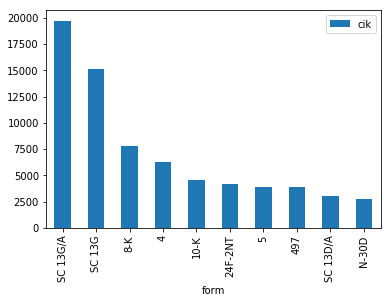

In [47]:
counts_df.sort_values('cik', ascending=False)[:10].plot.bar().plot()

In [57]:
counts_df.head()

,cik
form,
10-12B,5
10-12B/A,23
10-12G,34
10-12G/A,69
10-K,4540


In [49]:
index_df['date'] = index_df['date'].apply(pd.to_datetime)

In [51]:
index_df = index_df.set_index('date')



In [54]:
index_df.resample('M', how='count')

/home/gad/wd/projects/analyst_to_prorammer/my_venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


,form,company,cik,file
date,,,,
2000-01-31,22185,22185,22185,22185
2000-02-29,57420,57420,57420,57420
2000-03-31,36604,36604,36604,36604


In [60]:
list_forms = list(counts_df.sort_values('cik', ascending=False)[:10].index)
list_forms

['SC 13G/A',
 'SC 13G',
 '8-K',
 '4',
 '10-K',
 '24F-2NT',
 '5',
 '497',
 'SC 13D/A',
 'N-30D']

In [65]:
condition = index_df['form'].isin(list_forms)

In [68]:
popular_df = index_df[condition]
popular_df.head()

,form,company,cik,file
date,,,,
2000-03-31,10-K,1 800 CONTACTS INC,1050122,edgar/data/1050122/0000927356-00-000660.txt
2000-02-14,10-K,1ST ATLANTIC GUARANTY CORP,1050123,edgar/data/1050123/0001104659-00-000012.txt
2000-02-28,10-K,1ST ATLANTIC GUARANTY CORP,1050123,edgar/data/1050123/0001104659-00-000033.txt
2000-03-16,10-K,1ST SOURCE CORP,34782,edgar/data/34782/0000034782-00-000024.txt
2000-03-30,10-K,21ST CENTURY INSURANCE GROUP,100331,edgar/data/100331/0000100331-00-000003.txt


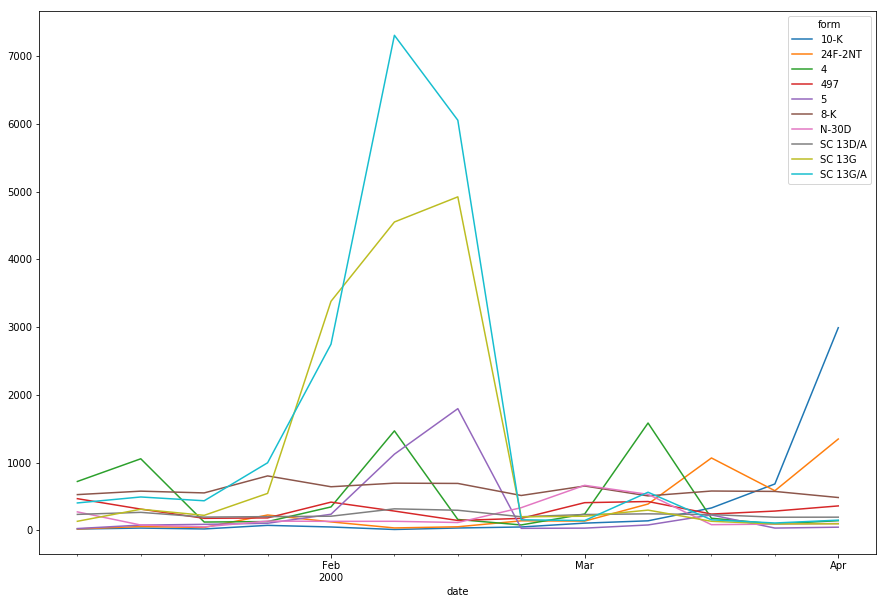

In [84]:
grouped = popular_df.groupby('form').resample('W', how='count')
fig, ax = plt.subplots(figsize=(15,10))
grouped['cik'].unstack('form').plot(ax=ax)